### 1) Preparing Airline data for RNN

In [1]:
from pandas import read_csv
import numpy as np

In [2]:
df = read_csv("international-airline-passengers.csv" , usecols = [1])
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [3]:
# print(df)
values = df.values.astype("float32")
values

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [4]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0] - train_size
train_size , test_size

(96, 48)

In [5]:
train , test = values[0 : train_size] , values[train_size : ]
train

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0 , 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)
train

array([[0.02588999],
       [0.04530746],
       [0.09061491],
       [0.08090615],
       [0.05501619],
       [0.10032365],
       [0.14239484],
       [0.14239484],
       [0.10355988],
       [0.04854369],
       [0.        ],
       [0.04530746],
       [0.03559873],
       [0.07119742],
       [0.11974111],
       [0.10032365],
       [0.06796119],
       [0.14563107],
       [0.21359226],
       [0.21359226],
       [0.17475727],
       [0.09385115],
       [0.03236246],
       [0.11650488],
       [0.13268611],
       [0.14886734],
       [0.2394822 ],
       [0.1909385 ],
       [0.22006473],
       [0.2394822 ],
       [0.3074434 ],
       [0.3074434 ],
       [0.25889972],
       [0.18770227],
       [0.13592234],
       [0.20064726],
       [0.2168285 ],
       [0.24595472],
       [0.2880259 ],
       [0.24919096],
       [0.25566342],
       [0.36893204],
       [0.40776703],
       [0.44660196],
       [0.33980587],
       [0.28155342],
       [0.22006473],
       [0.291

In [7]:
def create_dataset(data , k):
    dataX , dataY = [] , []
    for i in range(data.shape[0] - k):
        x = data[i : i + k , 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX) , np.array(dataY)

In [8]:
look_back = 12
trainx , trainy = create_dataset(train , look_back)
testx , testy = create_dataset(test , look_back)


In [9]:
print(trainx.shape)
## we have 84 datapoints and each datapoint is a sequence having 12 vector


## BUT the format RNN require is basically
## we have 84 datapoint each datapoints is a sequence havinf 12 vector 
## and each vector has some features as well , in this case it is equal to 1



## letsay we have 100 datapoints 
## each datapoint has a sequence of 12 images 
## and each images has some features in this case it's equal to it's total pixel


## FORMAT
# [ # of images , len of sequence , # of featuresin each time frame]


trainx = np.reshape(trainx , (trainx.shape[0] , trainx.shape[1] , 1))
testx = np.reshape(testx , (testx.shape[0] , testx.shape[1] , 1))
trainx.shape

(84, 12)


(84, 12, 1)

### 2) Setting up the RNN Model

In [10]:
## default activation function in RNN is tanh

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN , Dense

Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(SimpleRNN(4 , input_shape = (look_back , 1)))
## 4 ===>> no of units
## 1 ===>> no of features in one time frame
model.add(Dense(1))
model.compile(loss = "mean_squared_error" , optimizer = "adam")
model.fit(trainx , trainy , epochs = 10 , batch_size = 1)
## loss function seems to go down
## it actually using backpropagation through time....Hahahha it sounds 
## like we are going back in time

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 0.0185
Epoch 2/10
84/84 [==============================] - 0s 6ms/step - loss: 0.0132
Epoch 3/10
84/84 [==============================] - 1s 6ms/step - loss: 0.0114
Epoch 4/10
84/84 [==============================] - 1s 6ms/step - loss: 0.0101
Epoch 5/10
84/84 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 6/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 7/10
84/84 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 8/10
84/84 [==============================] - 1s 6ms/step - loss: 0.0078
Epoch 9/10
84/84 [==============================] - 1s 6ms/step - loss: 0.0077
Epoch 10/10
84/84 [==============================] - 1s 6ms/step - loss: 0.0074


### 3) Analysing th output

In [13]:
testpredict = model.predict(testx)
testpredict = scaler.inverse_transform(testpredict).ravel()

trainpredict = model.predict(trainx)
trainpredict = scaler.inverse_transform(trainpredict).ravel()

testTrue = scaler.inverse_transform([testy]).ravel()
trainTrue = scaler.inverse_transform([trainy]).ravel()

testpredict.shape , testy.shape , testTrue.shape

((36,), (36,), (36,))

In [14]:
from matplotlib import pyplot as plt

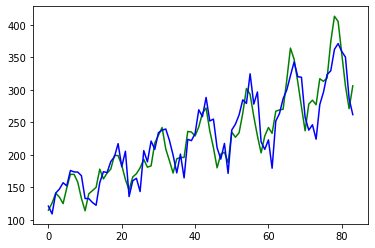

In [15]:
## plot training data
plt.plot(trainTrue , c = "g")
plt.plot(trainpredict , c = "b")
plt.show()

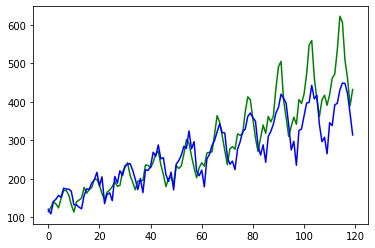

In [17]:
## plot ( training + testing ) data

combinedPredicted = np.concatenate((trainpredict , testpredict))
combinedTrue = np.concatenate((trainTrue , testTrue))
plt.plot(combinedTrue , c = "g")
plt.plot(combinedPredicted , c = "b")
plt.show()